 # Đồ án Cuối Kì Khoa học Dữ liệu 

********************************

# Import

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np


from requests_html import HTMLSession
from bs4 import BeautifulSoup
import json
import time # Dùng để sleep chương trình
import datetime as dt # Dùng để xử lý dữ liệu thời gian
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

In [2]:
import sklearn
sklearn.__version__

'0.23.1'

# Khám phá dữ liệu

In [3]:
# Đọc dữ liệu car detail từ file
cars = pd.read_csv("all_cars.data", sep = "\t")

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = cars.copy()
df

,url,name,model,brand,eLabel,bodyType,length,height,width,weight,...,fuelConsumption,speed,payload,trailerWeight,vEengineType,vEfuelType,vEengineDisplacement,vEenginePower,torque,price
0,http://www.cars-data.com//en/audi-rs4-avant-2....,Audi RS4 Avant 2.9 TFSI quattro,Audi RS4 Avant,Audi,G,stationwagon,4781,1404 mm,1866 mm,1730 kg,...,"9,2 l/100km",250 km/h,620 kg,1900 kg,dohc,petrol,2894 cc,0 KW,600 Nm,122.000
1,http://www.cars-data.com//en/audi-rs5-sportbac...,Audi RS5 Sportback 2.9 TFSI quattro,Audi RS5 Sportback,Audi,G,hatchback,4783,1399 mm,1866 mm,1695 kg,...,"9,1 l/100km",250 km/h,625 kg,0 kg,dohc,petrol,2894 cc,0 KW,600 Nm,119.420
2,http://www.cars-data.com//en/audi-tt-coupe-40-...,Audi TT Coupe 40 TFSI,Audi TT Coupe,Audi,D,coupe,4191,1376 mm,1832 mm,1245 kg,...,"6,0 l/100km",250 km/h,460 kg,0 kg,dohc,petrol,1984 cc,0 KW,320 Nm,50.070
3,http://www.cars-data.com//en/audi-tt-coupe-45-...,Audi TT Coupe 45 TFSI,Audi TT Coupe,Audi,E,coupe,4191,1376 mm,1832 mm,1225 kg,...,"6,5 l/100km",250 km/h,460 kg,0 kg,dohc,petrol,1984 cc,0 KW,370 Nm,52.150
4,http://www.cars-data.com//en/audi-tt-coupe-45-...,Audi TT Coupe 45 TFSI,Audi TT Coupe,Audi,E,coupe,4191,1376 mm,1832 mm,1260 kg,...,"6,4 l/100km",250 km/h,460 kg,0 kg,dohc,petrol,1984 cc,0 KW,370 Nm,54.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45448,http://www.cars-data.com//en/lada-1200-e-specs...,Lada 1200 E,Lada 1200,Lada,-,sedan,4073,1382 mm,1611 mm,934 kg,...,"9,5 l/100km",140 km/h,496 kg,750 kg,ohc,petrol,1198 cc,44 KW,89 Nm,4.152
45449,http://www.cars-data.com//en/saab-99-gl-cm-spe...,Saab 99 GL CM,Saab 99,Saab,N.A.,sedan,4480,1440 mm,1690 mm,1120 kg,...,"9,4 l/100km",160 km/h,440 kg,NaN,ohc,petrol,1985 cc,74 KW,162 Nm,11.340
45450,http://www.cars-data.com//en/saab-99-gl-cm-spe...,Saab 99 GL CM,Saab 99,Saab,N.A.,sedan,4480,1440 mm,1690 mm,1160 kg,...,"9,4 l/100km",160 km/h,450 kg,NaN,ohc,petrol,1985 cc,74 KW,162 Nm,11.794
45451,http://www.cars-data.com//en/citroen-2cv-6-spe...,Citroen 2CV 6 Special,Citroen 2CV,Citroen,N.A.,sedan,3830,1600 mm,1480 mm,560 kg,...,NaN,115 km/h,370 kg,400 kg,ohc,petrol,602 cc,21 KW,38 Nm,5.241


In [216]:
# Kiểm tra dữ liệu có bao nhiêu row, col
df.shape

(45453, 34)

In [217]:
# Kiểm tra xem có dòng nào bị lặp không
cars.duplicated().sum()

0

In [24]:
# Mỗi cột có ý nghĩa gì, đọc file discription
discription = pd.read_csv('Cars_description.csv')
discription

,Name_col,Description
0,url,Link xem thông tin chi tiết của xe
1,name,Tên xe
2,model,Dòng xe
3,brand,Thương hiệu
4,eLabel,"Nhãn năng lượng, cho biết hiệu suất năng lượng..."
5,bodyType,"Loại thân xe (station wagon, hatch back, coupe..."
6,length,Chiều dài xe (mm)
7,height,Chiều cao xe (mm)
8,width,Chiều rộng xe (mm)
9,weightTotal,Trọng lượng xe (kg)


In [219]:
# Xem có output (price) nào bị thiếu hay không
len(df[df.price == 'N.A.'])

143

# Tiền xử lý

### Tách riêng hai dạng cột số và cat

In [5]:
categorical_cols = ['url', 'name', 'model', 'brand', 'eLabel', 'bodyType', 'modelDate', 'fuelType', 'vehicleTransmission', 
                    'driveWheelConfiguration', 'vEengineType', 'vEfuelType'] #Phân loại cột kiểu Cat
number_cols = [] #Phân loại cột dạng Num
for x in cars.columns:
    if not (x in categorical_cols):
        number_cols.append(x)

assert (len(categorical_cols)+len(number_cols))==len(cars.columns) # Kiểm tra các cột tách ra có bằng số lượng cột ban đầu?

print('Caterogical Columns:', categorical_cols, '\n\n','Number Columns:', number_cols)


Caterogical Columns: ['url', 'name', 'model', 'brand', 'eLabel', 'bodyType', 'modelDate', 'fuelType', 'vehicleTransmission', 'driveWheelConfiguration', 'vEengineType', 'vEfuelType'] 

 Number Columns: ['length', 'height', 'width', 'weight', 'weightTotal', 'emissionsCO2', 'numberOfAxles', 'numberOfDoors', 'numberOfForwardGears', 'seatingCapacity', 'cargoVolume', 'roofLoad', 'accelerationTime', 'fuelCapacity', 'fuelConsumption', 'speed', 'payload', 'trailerWeight', 'vEengineDisplacement', 'vEenginePower', 'torque', 'price']


### Xử lí các cột dạng caterogical

In [221]:
for col in categorical_cols[:]:
    print(col, len(cars[col].unique()))

url 45453
name 25892
model 1677
brand 89
eLabel 9
bodyType 11
modelDate 51
fuelType 10
vehicleTransmission 1
driveWheelConfiguration 6
vEengineType 4
vEfuelType 10


In [222]:
# Xem sự khác nhau giữa 2 cột bên dưới
(~(df['fuelType']==df['vEfuelType'])).sum()

100

### Phân tích xóa các thuộc tính không cần thiết
1. Các cột url, name, model sẽ được loại bỏ vì không cần thiết<br>
2. Cột VehicleTransmission chỉ tồn tại duy nhất 1 giá trị, nên khi khai thác sẽ không có tác dụng<br>
3. Hai cột fuelType và vEfuelType khi so sánh ta thấy giá trị false (tức khác nhau giữa hai cột là 100 <<< 45310), nghĩa là hai cột này là giống nhau vì vậy xóa một cột, xóa vEfuelType vì fuelType tên ngắn hơn.
4. Cột cargoVolume có rất nhiều giá trị rác khó xử lí nên loại bỏ.
5. Cột modelDate chỉ gồm năm sản xuất, nên không có ý nghĩa cho dự đoán cần loại bỏ.

Các cột cần loại bỏ: 'url', 'name', 'model', 'vehicleTransmission', 'vEfuelType', 'cargoVolume', 'modelDate'

### Xử lí các cột dạng số

In [6]:
# Xóa các dòng mà price = nan
df = df[df.price != 'N.A.']
df['price'].unique()

array(['122.000', '119.420', '50.070', ..., '4.152', '5.241', '5.704'],
      dtype=object)

In [7]:
def prepro_num(num): #Xử lí các cột số
    if type(num) == str: #Có col có dạng int thì giữ nguyên
        num = num.replace(',','.') #hỗ trợ chuyển string sang float vì , thì không thể chuyển được
        num = num.split()[0] #Tách phần sau ra như đơn vị: km, m, ...
    val = None # Dùng biến tạp để ép kiểu sang float cho các giá trị trên
    try:
        val = float(num)
    except ValueError:
        return val
    return val

for x in number_cols: #Lặp các cột trong các cột dạng số để lọc
    df[x] = df[x].apply(prepro_num)

<ipython-input-7-b469ed75af30>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].apply(prepro_num)


In [8]:
df.replace('N.A.',np.nan, inplace = True)
df.replace('-',np.nan, inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [9]:
# Dữ liệu sau khi được làm sạch
df

,url,name,model,brand,eLabel,bodyType,length,height,width,weight,...,fuelConsumption,speed,payload,trailerWeight,vEengineType,vEfuelType,vEengineDisplacement,vEenginePower,torque,price
0,http://www.cars-data.com//en/audi-rs4-avant-2....,Audi RS4 Avant 2.9 TFSI quattro,Audi RS4 Avant,Audi,G,stationwagon,4781.0,1404.0,1866.0,1730.0,...,9.2,250.0,620.0,1900.0,dohc,petrol,2894.0,0.0,600.0,122.000
1,http://www.cars-data.com//en/audi-rs5-sportbac...,Audi RS5 Sportback 2.9 TFSI quattro,Audi RS5 Sportback,Audi,G,hatchback,4783.0,1399.0,1866.0,1695.0,...,9.1,250.0,625.0,0.0,dohc,petrol,2894.0,0.0,600.0,119.420
2,http://www.cars-data.com//en/audi-tt-coupe-40-...,Audi TT Coupe 40 TFSI,Audi TT Coupe,Audi,D,coupe,4191.0,1376.0,1832.0,1245.0,...,6.0,250.0,460.0,0.0,dohc,petrol,1984.0,0.0,320.0,50.070
3,http://www.cars-data.com//en/audi-tt-coupe-45-...,Audi TT Coupe 45 TFSI,Audi TT Coupe,Audi,E,coupe,4191.0,1376.0,1832.0,1225.0,...,6.5,250.0,460.0,0.0,dohc,petrol,1984.0,0.0,370.0,52.150
4,http://www.cars-data.com//en/audi-tt-coupe-45-...,Audi TT Coupe 45 TFSI,Audi TT Coupe,Audi,E,coupe,4191.0,1376.0,1832.0,1260.0,...,6.4,250.0,460.0,0.0,dohc,petrol,1984.0,0.0,370.0,54.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45448,http://www.cars-data.com//en/lada-1200-e-specs...,Lada 1200 E,Lada 1200,Lada,NaN,sedan,4073.0,1382.0,1611.0,934.0,...,9.5,140.0,496.0,750.0,ohc,petrol,1198.0,44.0,89.0,4.152
45449,http://www.cars-data.com//en/saab-99-gl-cm-spe...,Saab 99 GL CM,Saab 99,Saab,NaN,sedan,4480.0,1440.0,1690.0,1120.0,...,9.4,160.0,440.0,NaN,ohc,petrol,1985.0,74.0,162.0,11.340
45450,http://www.cars-data.com//en/saab-99-gl-cm-spe...,Saab 99 GL CM,Saab 99,Saab,NaN,sedan,4480.0,1440.0,1690.0,1160.0,...,9.4,160.0,450.0,NaN,ohc,petrol,1985.0,74.0,162.0,11.794
45451,http://www.cars-data.com//en/citroen-2cv-6-spe...,Citroen 2CV 6 Special,Citroen 2CV,Citroen,NaN,sedan,3830.0,1600.0,1480.0,560.0,...,NaN,115.0,370.0,400.0,ohc,petrol,602.0,21.0,38.0,5.241


### Chia tập train, validation, test (60%, 20%, 20%)

In [11]:
# Tách X và y
y_price = df["price"] # sr là viết tắt của series
X_df = df.drop("price", axis=1)

In [12]:
train_X_df, val_X_df, train_y_price, val_y_price = train_test_split(X_df, y_price, test_size=0.4, random_state=0)

In [13]:
val_X_df, test_X_df, val_y_price, test_y_price = train_test_split(val_X_df, val_y_price, test_size=0.5, random_state=0)

In [230]:
print(train_X_df.shape)
print(val_X_df.shape)
print(test_X_df.shape)

(27186, 33)
(9062, 33)
(9062, 33)


In [ ]:
# Lưu các tập xuống file
'''
file_train_df = pd.concat([train_X_df, train_y_price],axis=1)
file_validation_df = pd.concat([val_X_df, val_y_price],axis=1)
file_test_df = pd.concat([test_X_df, test_y_price],axis=1)

file_train_df.to_csv('file_train_df.csv')
file_validation_df.to_csv('file_validation_df.csv')
file_test_df.to_csv('file_test_df.csv')
'''

In [7]:
# Read các tập dữ liệu
file_train_df = pd.read_csv('file_train_df.csv', index_col=0)
file_validation_df = pd.read_csv('file_validation_df.csv', index_col=0)
file_test_df = pd.read_csv('file_test_df.csv', index_col=0)

train_X_df = file_train_df.drop('price', axis = 1)
train_y_price = file_train_df['price']
val_X_df = file_validation_df.drop('price', axis = 1)
val_y_price = file_validation_df['price']
test_X_df = file_test_df.drop('price', axis = 1)
test_y_price = file_test_df['price']

### Tạo pipeline

In [10]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_brand=1):
        self.num_top_brand = num_top_brand
    def fit(self, X_df, y=None):
        title_col = X_df['brand']
        self.title_counts_ = title_col.value_counts()
        titles = list(self.title_counts_.index)
        self.top_titles_ = titles[:max(1, min(self.num_top_brand, len(titles)))]
        return self
    def transform(self, X_df, y=None):
        # YOUR CODE HERE
        
        self.X_df = X_df.copy()
        title_col = self.X_df['brand'].copy()
        title_col[title_col.isin(self.top_titles_) == False] = 'Others'
        self.X_df.drop('brand',axis = 1, inplace = True)
        self.X_df["brand"] = title_col 
        
        drive_wheel = self.X_df['driveWheelConfiguration'].value_counts()
        wheel = list(drive_wheel.index)
        top_wheel = wheel[:max(1, min(3, len(wheel)))]

        drivewheel_col = self.X_df['driveWheelConfiguration'].copy()
        drivewheel_col[drivewheel_col.isin(top_wheel) == False] = 'Others'
        self.X_df.drop('driveWheelConfiguration',axis = 1, inplace = True)
        self.X_df["driveWheelConfiguration"] = drivewheel_col

        self.X_df.drop(['url', 'name','model','vehicleTransmission','vEfuelType','cargoVolume','modelDate'],axis=1, inplace = True)
        
        return self.X_df

In [14]:
col_adderdropper = ColAdderDropper()

In [21]:
number_cols = ['length', 'height', 'width', 'weight', 'weightTotal', 'emissionsCO2', 'numberOfAxles', 'numberOfDoors', 
            'numberOfForwardGears', 'seatingCapacity', 'roofLoad', 'accelerationTime', 'fuelCapacity', 
            'fuelConsumption', 'speed', 'payload', 'trailerWeight', 'vEengineDisplacement', 'vEenginePower', 'torque']

categorical_cols = ['brand','bodyType', 'fuelType', 'vEengineType','eLabel','driveWheelConfiguration']

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')
encoding = OneHotEncoder(handle_unknown='ignore', sparse=False)
cate_cols_transformer = make_pipeline(mode_imputer, encoding)

column_transformer = ColumnTransformer([('num_cols', mean_imputer, number_cols),
                                    ('categorical_cols', cate_cols_transformer, categorical_cols)])
col_standardized = StandardScaler()

mlpregressor = MLPRegressor(hidden_layer_sizes=(512, 512, ), solver='adam', learning_rate='adaptive'\
                            ,random_state=0, max_iter=500, early_stopping=True, verbose=0)

full_pipeline = make_pipeline(col_adderdropper, column_transformer, col_standardized, mlpregressor)
full_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num_cols', SimpleImputer(),
                                                  ['length', 'height', 'width',
                                                   'weight', 'weightTotal',
                                                   'emissionsCO2',
                                                   'numberOfAxles',
                                                   'numberOfDoors',
                                                   'numberOfForwardGears',
                                                   'seatingCapacity',
                                                   'roofLoad',
                                                   'accelerationTime',
                                                   'fuelCapacity',
                                                   'fuelConsumption', 'speed',
                                                   'paylo...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['brand', 'bodyType',
                                                   'fuelType', 'vEengineType',
                                                   'eLabel',
                                                   'driveWheelConfiguration'])])),
                ('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True,
                              hidden_layer_sizes=(512, 512),
                              learning_rate='adaptive', max_iter=500,
                              random_state=0, verbose=0))])

In [16]:
full_pipeline.fit_transform(train_X_df)

array([[4.467e+03, 1.407e+03, 1.698e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.687e+03, 1.671e+03, 1.903e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.256e+03, 1.404e+03, 1.810e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.770e+03, 1.350e+03, 1.540e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.190e+03, 1.390e+03, 1.610e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.659e+03, 1.461e+03, 1.814e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

## Huấn luyện mô hình

In [24]:
def train_and_calc_val_score(full_pipeline, train_X, train_y, val_X, val_y):
    full_pipeline.fit(train_X, train_y);
    train_score = full_pipeline.score(train_X, train_y)
    val_score = full_pipeline.score(val_X, val_y)
    print(train_score,val_score)
    return train_score, val_score

In [124]:
train_errs = []
val_errs = []
hidden_layers = [(50,),(100,),(150,),(50,50,),(50,50,50,)]
num_top_brands = [5, 10, 15, 20, 25]
best_val_err = float('inf'); best_hidden_layer = None; best_num_top_brand = None
for hidden_layer in hidden_layers:
    for num_top_brand in num_top_brands:
        # YOUR CODE HERE
        full_pipeline.set_params(coladderdropper__num_top_brand = num_top_brand, mlpregressor__hidden_layer_sizes=hidden_layer)
        full_pipeline.fit(train_X_df,train_y_price);
        temp=(1-full_pipeline.score(val_X_df,val_y_price))*100
        if(val_errs and temp<min(val_errs)):
            best_num_top_brand=num_top_brand
            best_hidden_layer=hidden_layer
            best_val_err=temp
        val_errs.append(temp)
        train_errs.append((1-full_pipeline.score(train_X_df, train_y_price))*100)
        print(val_errs,end='\r')        
'Finish!'

'Finish!'

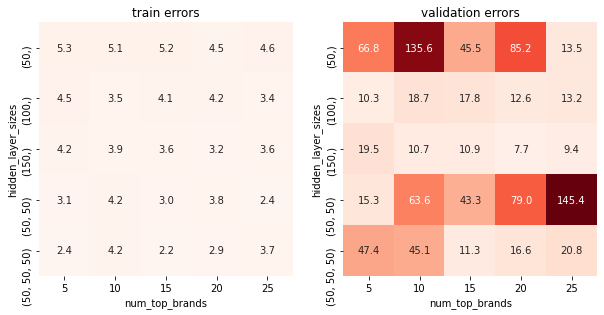

In [143]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(hidden_layers), -1),
                             index=hidden_layers, columns=num_top_brands)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(hidden_layers), -1), 
                           index=hidden_layers, columns=num_top_brands)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('num_top_brands'); plt.ylabel('hidden_layer_sizes')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('num_top_brands'); plt.ylabel('hidden_layer_sizes');

In [206]:
best_num_top_brand, best_hidden_layer

(20, (150,))

### Tham số tốt nhất cho mô hình
best_num_top_brand = 20 <br>
best_hidden_layer = (150,) <br>
- Độ lỗi trên tập huấn luyện là: 3.2 <br>
- Độ lỗi trên tập validation là: 7.7

In [25]:
# Chaỵ mô hình với siêu tham số tìm được
best_num_top_brand = 20
best_hidden_layer = (150,)
mlpregressor = MLPRegressor(hidden_layer_sizes=best_hidden_layer, solver='adam', learning_rate='adaptive'\
                            ,random_state=0, max_iter=500, early_stopping=True, verbose=1)
full_pipeline = make_pipeline(col_adderdropper, column_transformer, col_standardized, mlpregressor)
full_pipeline.set_params(coladderdropper__num_top_brand=best_num_top_brand)
train_and_calc_val_score(full_pipeline, train_X_df, train_y_price, val_X_df, val_y_price)

Iteration 1, loss = 754.59405313
Validation score: 0.343738
Iteration 2, loss = 168.43875225
Validation score: 0.707225
Iteration 3, loss = 93.12630132
Validation score: 0.766519
Iteration 4, loss = 76.07567450
Validation score: 0.785353
Iteration 5, loss = 68.40972073
Validation score: 0.798810
Iteration 6, loss = 64.02358340
Validation score: 0.808396
Iteration 7, loss = 60.45405991
Validation score: 0.816013
Iteration 8, loss = 57.46090398
Validation score: 0.820959
Iteration 9, loss = 54.78104450
Validation score: 0.826591
Iteration 10, loss = 52.64245045
Validation score: 0.832309
Iteration 11, loss = 50.84103521
Validation score: 0.837173
Iteration 12, loss = 49.06791196
Validation score: 0.841959
Iteration 13, loss = 47.50766706
Validation score: 0.841516
Iteration 14, loss = 46.57317696
Validation score: 0.846793
Iteration 15, loss = 45.04820304
Validation score: 0.851848
Iteration 16, loss = 43.77849482
Validation score: 0.852993
Iteration 17, loss = 42.57371259
Validation sco

Iteration 138, loss = 14.40040826
Validation score: 0.932632
Iteration 139, loss = 14.19251353
Validation score: 0.930659
Iteration 140, loss = 14.09540665
Validation score: 0.931241
Iteration 141, loss = 13.85209721
Validation score: 0.933060
Iteration 142, loss = 14.57568638
Validation score: 0.933325
Iteration 143, loss = 14.14267963
Validation score: 0.932881
Iteration 144, loss = 14.09804850
Validation score: 0.933791
Iteration 145, loss = 14.14038649
Validation score: 0.932476
Iteration 146, loss = 14.06887510
Validation score: 0.932499
Iteration 147, loss = 13.88815353
Validation score: 0.932042
Iteration 148, loss = 13.67411862
Validation score: 0.931504
Iteration 149, loss = 13.71604261
Validation score: 0.933648
Iteration 150, loss = 13.79618458
Validation score: 0.933081
Iteration 151, loss = 13.61489764
Validation score: 0.933744
Iteration 152, loss = 13.65521156
Validation score: 0.934868
Iteration 153, loss = 13.53595050
Validation score: 0.934827
Iteration 154, loss = 13

(0.9680890728253737, 0.9233226913273426)

In [26]:
#full_pipeline.set_params(coladderdropper__num_top_brand = best_num_top_brand, mlpregressor__hidden_layer_sizes=best_hidden_layer)

In [58]:
pred_y=full_pipeline.predict(test_X_df)
(1 - full_pipeline.score(test_X_df, test_y_price))*100

8.487421409857976

### Vậy độ lỗi trên tập test là: 8.5%

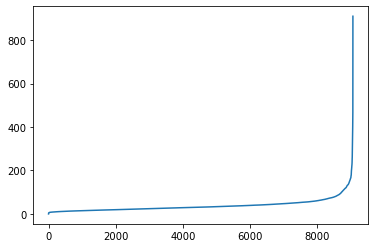

In [54]:
plot_price = pd.DataFrame({'Actual':test_y_price,'Predict':pred_y})
plot_price = plot_price.sort_values(by=['Actual'])
plot_price = plot_price.reset_index()
plot_price.drop('index',axis = 1, inplace = True)
plot_price['Actual'].plot()

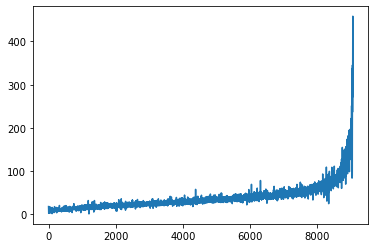

In [55]:
plot_price['Predict'].plot()

In [232]:
df=pd.DataFrame(columns=['Car name','Price'])
df['Car name']=test_X_df['name']
df['Price']=pred_y
df.to_csv('my_preds_prices.csv',index=False)
df

,Car name,Price
34446,Opel Vectra Stationwagon 1.6i-16V Sport Edition,21.301638
38806,Lancia Dedra Station Wagon 1.8 LS,18.320584
22030,Mitsubishi Colt CZ5 1.5 Di-D Incharge,25.337264
42805,Daihatsu Charade CG,6.493754
18565,Subaru Legacy 2.0i Executive,37.027053
11276,BMW 114d,27.922375
20819,Seat Ibiza SC 1.9 TDI 90hp Reference,19.186355
39593,Mercedes E 200 Diesel,30.331257
38825,Land Rover Range Rover 2.5 DSE,45.036272
22773,Volvo V50 1.6,25.034056
